<a href="https://colab.research.google.com/github/sudhanshuwadhwani16/GRIP-Intership-Sparks/blob/main/Taskk_1(Supervised_Leaning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
from google.colab import files
uploaded = files.upload()

Saving hours_score.csv to hours_score (2).csv


In [15]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hours_score.csv']))
print("Data imported successfully")
# Dataset is now stored in a Pandas Dataframe

Data imported successfully


In [16]:
df.head()

,HOURS,SCORES
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
df.describe()

,HOURS,SCORES
count,25.000000,25.000000
mean,5.020000,51.560000
std,2.515121,25.199339
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


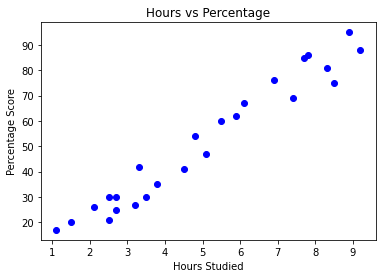

In [21]:
#Plotting the distribution of scores
plt.scatter(df['HOURS'],df['SCORES'],color='blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [22]:
#Preparing the data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [23]:
#Splitting the data into Training and Testing Sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [24]:
#Training the Model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training Model completed.")

Training Model completed.


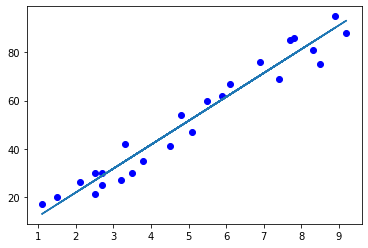

In [25]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='blue')
plt.plot(X, line);
plt.show()

In [26]:
#Making Predictions
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [27]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.867433
1,27,33.723530
2,69,75.368005
3,30,26.782784
4,62,60.494978


In [28]:
#Testing with own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.71140508710232


In [29]:
#Evaluating The model
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.189268013412942
